In [478]:
#GeoPands
import geopandas as gpd
import pandas as pd

In [479]:
#读取shp数
sz21road = gpd.read_file(r"D:\科研数据处理\立方数据学社\python城市数据爬取\python城市数据爬取练习\空间数据爬取\data\2021深圳街道.shp")

In [480]:
#查看shp数据的属性表
sz21road

,ID,AREA,ID1,AREA1,NAME,DISTRICT,DISTRICT_I,BLOCK_ID,geometry
0,1,118.358345,35,118.358299,南澳,大鹏新区,10,72,"POLYGON ((114.50794 22.55273, 114.50921 22.552..."
1,2,77.456596,36,77.456650,大鹏,大鹏新区,10,73,"POLYGON ((114.57531 22.65126, 114.57535 22.651..."
2,3,101.728271,37,101.728271,葵涌,大鹏新区,10,74,"POLYGON ((114.43086 22.66200, 114.43123 22.661..."
3,4,35.782391,42,35.782391,石井,坪山区,8,61,"POLYGON ((114.41659 22.71174, 114.41676 22.711..."
4,5,30.181820,41,30.181730,龙田,坪山区,8,62,"POLYGON ((114.35634 22.76777, 114.35634 22.767..."
...,...,...,...,...,...,...,...,...,...
69,136,39.509285,9,41.793553,桃源,南山区,3,28,"POLYGON ((113.98311 22.63666, 113.98315 22.636..."
70,144,45.129253,0,0.001144,盐田,盐田区,4,29,"POLYGON ((114.21799 22.58699, 114.22210 22.587..."
71,105,3.490010,26,0.380565,笋岗,罗湖区,2,20,"POLYGON ((114.12187 22.57390, 114.12276 22.572..."
72,147,24.622255,38,11.619492,碧岭,坪山区,8,60,"POLYGON ((114.27168 22.65517, 114.27140 22.656..."


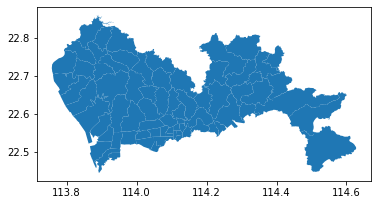

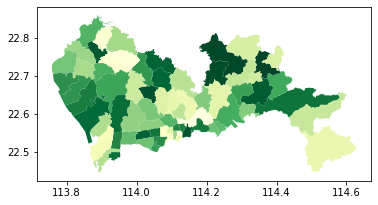

In [481]:
#简单的数据可视化
#直接展示shp图像
sz21road.plot()
#加入颜色分区
sz21road.plot(column="NAME", cmap="YlGn")

In [482]:
#读入excel文件
df = pd.read_excel(r"D:\科研数据处理\立方数据学社\python城市数据爬取\python城市数据爬取练习\空间数据爬取\data\shopping_mall.xlsx")

In [483]:
#查看为转换之前数据形式
df.head(1)

,id,name,cityname,adname,lat,lng,type,floor,truefloor
0,B02F38UEKF,麻豆生活(保利文化广场店),深圳市,南山区,22.520434,113.933922,购物服务;服装鞋帽皮具店;品牌服装店,2,F2


In [484]:
#指定经纬度坐标所在列，将excel数据转换为geopandas所支持的格式
point = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(df.lng,df.lat))

In [485]:
#查看数据转换后的第一行
point.head(1)

,id,name,cityname,adname,lat,lng,type,floor,truefloor,geometry
0,B02F38UEKF,麻豆生活(保利文化广场店),深圳市,南山区,22.520434,113.933922,购物服务;服装鞋帽皮具店;品牌服装店,2,F2,POINT (113.93392 22.52043)


In [486]:
#指定坐标系 epgsg4326为WGS1984（地理坐标系）
point.crs = "EPSG:4326"

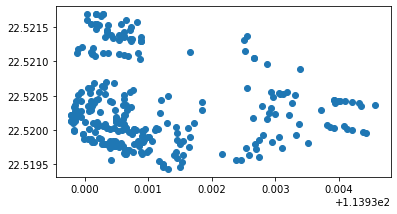

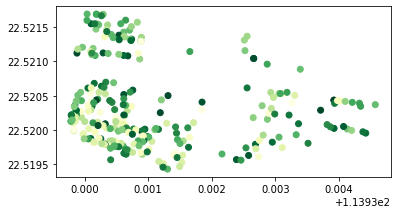

In [487]:
#直接可视化
point.plot()
#加入颜色分区
point.plot(column ="name",cmap="YlGn")

In [488]:
#空间分析
#1.缓冲区
#读取学区边界和写字楼数据
school_district = gpd.read_file(r"D:\科研数据处理\立方数据学社\python城市数据爬取\python城市数据爬取练习\空间数据爬取\data\学区数据.shp")
office_buildings =gpd.read_file(r"D:\科研数据处理\立方数据学社\python城市数据爬取\python城市数据爬取练习\空间数据爬取\data\写字楼数据.geojson")

In [489]:
#查看属性表前三行
school_district.head(3)

,no,name,point,geometry
0,01,荔园通新岭校区,"114.103493,22.552359","POLYGON ((114.08804 22.55004, 114.09334 22.550..."
1,02,园岭小学,"114.104911,22.556381","POLYGON ((114.10286 22.55744, 114.10643 22.557..."
2,03,福田小学,"114.089027,22.542053","POLYGON ((114.08371 22.54581, 114.09310 22.546..."


In [490]:
office_buildings.head(3)

,名称,价格(万元/月),层高,停车位,lng,lat,geometry
0,生命人寿大厦（富德生命保险大厦）,99~290,"层高3.3米,净高3米","地上65个,地下450个",114.058672,22.548680,POINT (114.05867 22.54868)
1,京地大厦,107~238,33元/平米/月,,114.062138,22.535180,POINT (114.06214 22.53518)
2,卓越大厦,122~187,,地上15个，地下243个,114.046053,22.540564,POINT (114.04605 22.54056)


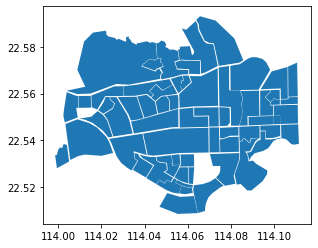

In [491]:
#原始数据可视化
school_district.plot()

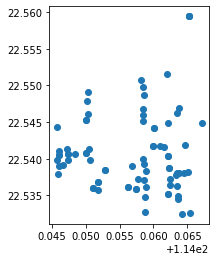

In [492]:
office_buildings.plot()

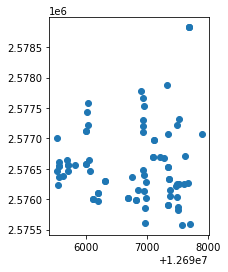

In [493]:
#转换为投影坐标系WGS1984
office_buildings = office_buildings.to_crs("EPSG:3857")
office_buildings.head(3)
office_buildings.plot()

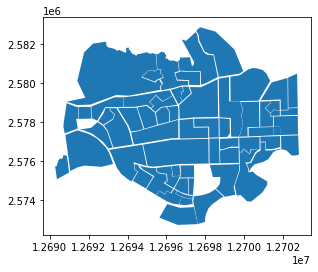

In [494]:
school_district = school_district.to_crs("EPSG:3857")
school_district.head(3)
school_district.plot()

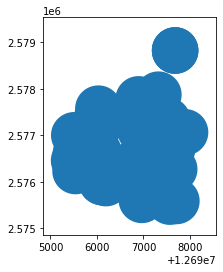

In [495]:
#创建500m缓冲区及可视化
office_buildings["geometry"]=office_buildings.buffer(500)
office_buildings.plot()

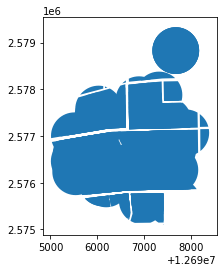

In [496]:
#2.裁剪
#求交集
district_office = gpd.overlay(school_district,office_buildings,how="intersection")
district_office.plot()

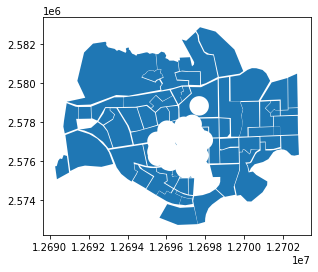

In [497]:
#用第二个参数裁剪第一个参数
district_office2 = gpd.overlay(school_district,office_buildings,how = "difference")
district_office2.plot()

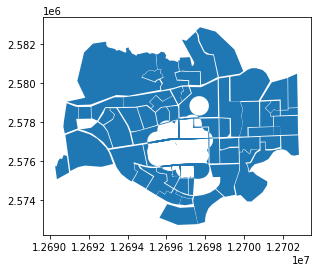

In [498]:
#裁剪两个集合共有的部分
district_office3 = gpd.overlay(office_buildings,school_district,how = "symmetric_difference")
district_office3.plot()

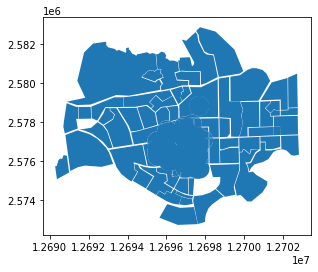

In [499]:
#两个集合的并集
district_office4 = gpd.overlay(office_buildings,school_district,how = "union")
district_office4.plot()

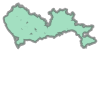

In [500]:
#3.融合
#原始数据
sz21road
#融合为一行
sz21roads=sz21road.unary_union 
sz21roads

In [501]:
#4.空间连接
office_buildings
office_buildings_with_school_boundary = gpd.sjoin(office_buildings,school_district,how="inner",op="intersects")
office_buildings_with_school_boundary.head(3)

,名称,价格(万元/月),层高,停车位,lng,lat,geometry,index_right,no,name,point
0,生命人寿大厦（富德生命保险大厦）,99~290,"层高3.3米,净高3米","地上65个,地下450个",114.058672,22.548680,"POLYGON ((12697453.267 2577529.628, 12697450.8...",21,24,景鹏小学,"114.053797,22.548562"
2,卓越大厦,122~187,,地上15个，地下243个,114.046053,22.540564,"POLYGON ((12696048.516 2576551.415, 12696046.1...",21,24,景鹏小学,"114.053797,22.548562"
6,诺德金融中心,138~240,,地上10个 地下420个,114.058490,22.545985,"POLYGON ((12697433.019 2577204.730, 12697430.6...",21,24,景鹏小学,"114.053797,22.548562"


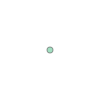

In [508]:
#Shapely
from shapely.geometry import Point
#创建一个点
point = Point(30.824,120.703)
point

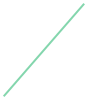

In [503]:
#创建一条线
from shapely.geometry import LineString
line = LineString([[30.824,120.703],[35.428,126,307]])
line

In [509]:
line.length

7.018192431103605

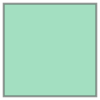

In [511]:
#创建一个面
from shapely.geometry import Polygon
polygon = Polygon((((0,0),(0,1),(1,1),(1,0))))
polygon

In [513]:
polygon.length

4.0

In [512]:
polygon.area

1.0